In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from attention import Attention

from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Input
from keras import Model
import tensorflow as tf

In [44]:
df = pd.read_csv('./data/kdd17/ourpped/AAPL.csv', header=None)

val_idx = int(df.shape[0]*0.8)
time_steps = 5 
input_dim = 11 # features
units = 3 # hidden state units
epochs = 10

In [45]:
df = df[29:]
# df = df.to_numpy()

In [46]:
X_train = []
y_train = []
X_test = []
y_test = []
for i in range(time_steps, val_idx):
    X_train.append(df.iloc[i-time_steps:i, :-2])
    # y_train.append((df.iloc[i,-2] + 1) / 2)
    y_train.append(df.iloc[i:i+1, 11])
X_train, y_train = np.array(X_train), np.array(y_train)

for i in range(val_idx, df.shape[0]):
    X_test.append(df.iloc[i-time_steps:i, :-2])
    # y_train.append((df.iloc[i,-2] + 1) / 2)
    y_test.append(df.iloc[i:i+1, 11])
X_test, y_test = np.array(X_test), np.array(y_test)

In [47]:
X_train.shape

(2009, 5, 11)

In [50]:
y_test


array([[ 0.],
       [ 1.],
       [ 1.],
       [ 0.],
       [ 1.],
       [ 1.],
       [-1.],
       [-1.],
       [ 1.],
       [-1.],
       [ 0.],
       [ 0.],
       [-1.],
       [-1.],
       [ 0.],
       [ 0.],
       [-1.],
       [-1.],
       [ 1.],
       [-1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [-1.],
       [-1.],
       [ 1.],
       [ 0.],
       [-1.],
       [ 1.],
       [-1.],
       [ 1.],
       [-1.],
       [ 0.],
       [ 1.],
       [ 1.],
       [-1.],
       [ 0.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [-1.],
       [ 1.],
       [-1.],
       [ 1.],
       [ 1.],
       [ 0.],
       [ 1.],
       [-1.],
       [-1.],
       [-1.],
       [ 1.],
       [ 0.],
       [-1.],
       [-1.],
       [ 1.],
       [ 1.],
       [-1.],
       [ 0.],
       [ 0.],
       [ 1.],
       [ 0.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 1.],
       [ 1.],
       [-1.],
       [ 1.],
      

In [62]:
# Define/compile the model.
model_input = Input(shape=(time_steps, input_dim))
x = Dense(input_dim, activation='tanh')(model_input)
x = LSTM(units, return_sequences=True)(x)
x = Attention(units=units)(x)
x = Dense(1)(x)
model = Model(model_input, x)
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])
model.summary()

Model: "model_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 5, 11)]           0         
                                                                 
 dense_22 (Dense)            (None, 5, 11)             132       
                                                                 
 lstm_11 (LSTM)              (None, 5, 3)              180       
                                                                 
 attention_7 (Attention)     (None, 3)                 27        
                                                                 
 dense_23 (Dense)            (None, 1)                 4         
                                                                 
Total params: 343
Trainable params: 343
Non-trainable params: 0
_________________________________________________________________


In [63]:
history = model.fit(X_train, y_train, epochs=epochs)

Epoch 1/10


2022-07-14 01:03:52.131137: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-14 01:03:52.201727: W tensorflow/core/grappler/costs/op_level_cost_estimator.cc:690] Error in PredictCost() for the op: op: "Softmax" attr { key: "T" value { type: DT_FLOAT } } inputs { dtype: DT_FLOAT shape { unknown_rank: true } } device { type: "GPU" } outputs { dtype: DT_FLOAT shape { unknown_rank: true } }
2022-07-14 01:03:52.321050: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


 4/63 [>.............................] - ETA: 1s - loss: 1.0974e-08 - accuracy: 0.2500  

2022-07-14 01:03:52.602910: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


63/63 [==============================] - 3s 19ms/step - loss: 5.1412e-09 - accuracy: 0.2598
Epoch 2/10
63/63 [==============================] - 1s 17ms/step - loss: 5.1412e-09 - accuracy: 0.2598
Epoch 3/10
63/63 [==============================] - 1s 16ms/step - loss: 5.1412e-09 - accuracy: 0.2598
Epoch 4/10
63/63 [==============================] - 1s 16ms/step - loss: 5.1412e-09 - accuracy: 0.2598
Epoch 5/10
63/63 [==============================] - 1s 16ms/step - loss: 5.1412e-09 - accuracy: 0.2598
Epoch 6/10
63/63 [==============================] - 1s 16ms/step - loss: 5.1412e-09 - accuracy: 0.2598
Epoch 7/10
63/63 [==============================] - 1s 17ms/step - loss: 5.1412e-09 - accuracy: 0.2598
Epoch 8/10
63/63 [==============================] - 1s 16ms/step - loss: 5.1412e-09 - accuracy: 0.2598
Epoch 9/10
63/63 [==============================] - 1s 16ms/step - loss: 5.1412e-09 - accuracy: 0.2598
Epoch 10/10
63/63 [==============================] - 1s 16ms/step - loss: 5.1412e-09

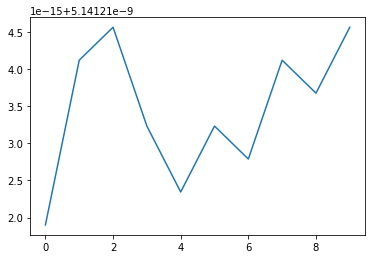

In [64]:
plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])

In [65]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)

2022-07-14 01:04:35.265599: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-14 01:04:35.294458: W tensorflow/core/grappler/costs/op_level_cost_estimator.cc:690] Error in PredictCost() for the op: op: "Softmax" attr { key: "T" value { type: DT_FLOAT } } inputs { dtype: DT_FLOAT shape { unknown_rank: true } } device { type: "GPU" } outputs { dtype: DT_FLOAT shape { unknown_rank: true } }
2022-07-14 01:04:35.344199: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


15/15 - 1s - loss: 1.0437e-09 - accuracy: 0.3326 - 555ms/epoch - 37ms/step


In [66]:
y_pred[0]

array([-2.2145247, -3.302362 , -3.8547864], dtype=float32)

In [2]:
import tensorflow as tf

vocab_size = 20000  # 빈도수 상위 2만개의 단어만 사용
max_len = 200  # 문장의 최대 길이

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.imdb.load_data(num_words=vocab_size)
print('훈련용 리뷰 개수 : {}'.format(len(X_train)))
print('테스트용 리뷰 개수 : {}'.format(len(X_test)))

17464789/17464789 [==============================] - 1s 0us/step
훈련용 리뷰 개수 : 25000
테스트용 리뷰 개수 : 25000


In [8]:
print(len(X_train))
print(len(X_train[0]))

25000
218


In [1]:
import numpy as np
import pandas as pd

In [13]:
x1 = np.array([[[1,2,3,4,5,6,7,8,9,10,11],
                   [1,2,3,4,5,6,7,8,9,10,11]],
                   [[1,2,3,4,5,6,7,8,9,10,11],
                   [1,2,3,4,5,6,7,8,9,10,11]],
                   [[1,2,3,4,5,6,7,8,9,10,11],
                   [1,2,3,4,5,6,7,8,9,10,11]],
                   [[1,2,3,4,5,6,7,8,9,10,11],
                   [1,2,3,4,5,6,7,8,9,10,11]],
                   [[1,2,3,4,5,6,7,8,9,10,11],
                   [1,2,3,4,5,6,7,8,9,10,11]],
                   [[1,2,3,4,5,6,7,8,9,10,11],
                   [1,2,3,4,5,6,7,8,9,10,11]],
                   [[1,2,3,4,5,6,7,8,9,10,11],
                   [1,2,3,4,5,6,7,8,9,10,11]],
                   [[1,2,3,4,5,6,7,8,9,10,11],
                   [1,2,3,4,5,6,7,8,9,10,11]],
                   [[1,2,3,4,5,6,7,8,9,10,11],
                   [1,2,3,4,5,6,7,8,9,10,11]],
                   [[1,2,3,4,5,6,7,8,9,10,11],
                   [1,2,3,4,5,6,7,8,9,10,11]],])
# x2 = np.array([[[1,2,3,4,5,6,7,8,9,10,11],
#                 [1,2,3,4,5,6,7,8,9,10,11]],
#                 [[1,2,3,4,5,6,7,8,9,10,11],
#                 [1,2,3,4,5,6,7,8,9,10,11]],])

In [9]:
x1.reshape()

(10, 2, 11)

In [32]:
x2 = np.array([[[1,2,3],
              [4,5,6],
              [7,10,9],
              [1,11,3],
              [16,12,3]],
              [[61,23,3],
              [14,22,3],
              [41,28,3],
              [21,21,3],
              [13,42,3]]])

In [33]:
x2.shape

(2, 5, 3)

In [34]:
x2.reshape(5,2,3)

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7, 10,  9],
        [ 1, 11,  3]],

       [[16, 12,  3],
        [61, 23,  3]],

       [[14, 22,  3],
        [41, 28,  3]],

       [[21, 21,  3],
        [13, 42,  3]]])

In [39]:
x3= np.array([[1,2,3],
              [4,5,6]])
x4= np.array([[1,2,3],
              [4,5,6]])

In [ ]:
x3.co